In [306]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [307]:
import pandas as pd
from seminartools.data import read_inflation
from seminartools.models.uc_sv_ss_model import UCSVSSModel

# 1. Read data

In [308]:
df_inflation = read_inflation(mergeable_format=True).reset_index()
df_inflation

country       date  inflation
0               Portugal 1970-04-01   0.000000
1            New Zealand 1970-04-01   0.015421
2     Dominican Republic 1970-04-01  -0.001604
3                Finland 1970-04-01   0.008333
4                Ireland 1970-04-01   0.029871
...                  ...        ...        ...
7415              Canada 2023-01-01   0.006080
7416              Sweden 2023-01-01   0.014955
7417               Korea 2023-01-01   0.010538
7418      United Kingdom 2023-01-01   0.008814
7419        South Africa 2023-01-01   0.011202

[7420 rows x 3 columns]

# 2. AR model per country

In [309]:
model = UCSVSSModel(num_particles = 10000, stochastic_seasonality=True)
model

In [310]:
df_inflation

country       date  inflation
0               Portugal 1970-04-01   0.000000
1            New Zealand 1970-04-01   0.015421
2     Dominican Republic 1970-04-01  -0.001604
3                Finland 1970-04-01   0.008333
4                Ireland 1970-04-01   0.029871
...                  ...        ...        ...
7415              Canada 2023-01-01   0.006080
7416              Sweden 2023-01-01   0.014955
7417               Korea 2023-01-01   0.010538
7418      United Kingdom 2023-01-01   0.008814
7419        South Africa 2023-01-01   0.011202

[7420 rows x 3 columns]

In [311]:
df_inflation.pivot(
    index = "date",
    columns = "country",
    values = "inflation"
)

country     Australia   Austria   Belgium    Canada    Cyprus   Denmark  \
date                                                                      
1970-04-01   0.011236  0.008889  0.005236  0.000000  0.004670  0.015152   
1970-07-01   0.011111  0.013216  0.010417  0.012500  0.021692  0.029851   
1970-10-01   0.021978  0.008696  0.005155 -0.006173  0.006673  0.014493   
1971-01-01   0.010753  0.012931  0.010256  0.006211  0.008436  0.000000   
1971-04-01   0.010638  0.008511  0.015228  0.012346  0.008366  0.021429   
...               ...       ...       ...       ...       ...       ...   
2022-01-01   0.021295  0.020300  0.033275  0.020211  0.009326  0.021536   
2022-04-01   0.017376  0.031142  0.016949  0.031008  0.049593  0.032997   
2022-07-01   0.017933  0.026846  0.025000  0.008354  0.018325  0.023957   
2022-10-01   0.019102  0.023603  0.030943  0.005675  0.005587  0.011265   
2023-01-01   0.013756  0.018693 -0.003628  0.006080 -0.008977  0.003145   

country     Dominican Republic      Fiji   Finland    France  ...  Portugal  \
date                                                          ...             
1970-04-01           -0.001604  0.003524  0.008333  0.006944  ...  0.000000   
1970-07-01           -0.008031  0.007902  0.000000  0.013793  ...  0.000000   
1970-10-01            0.016516  0.021777  0.008264  0.013605  ...  0.058824   
1971-01-01           -0.021344  0.027280  0.024590  0.013423  ...  0.000000   
1971-04-01            0.039714  0.004979  0.016000  0.013245  ...  0.055556   
...                        ...       ...       ...       ...  ...       ...   
2022-01-01            0.028900  0.034391  0.021415  0.014870  ...  0.015094   
2022-04-01            0.022648  0.011465  0.025524  0.022894  ...  0.050186   
2022-07-01            0.013293  0.007368  0.016000  0.011638  ...  0.010619   
2022-10-01            0.011811 -0.006470  0.022773  0.009796  ...  0.020228   
2023-01-01            0.015785  0.007644  0.017142  0.014162  ... -0.002154   

country     Singapore  South Africa     Spain    Sweden  Switzerland  \
date                                                                   
1970-04-01  -0.006706      0.058824  0.000000  0.015504     0.008982   
1970-07-01   0.008439      0.000000  0.042553  0.015267     0.011869   
1970-10-01   0.001674      0.000000  0.020408  0.015038     0.020528   
1971-01-01   0.016708      0.055556  0.020000  0.037037     0.020115   
1971-04-01  -0.013147      0.000000  0.019608  0.000000     0.014085   
...               ...           ...       ...       ...          ...   
2022-01-01   0.016682      0.014892  0.020852  0.016158     0.007859   
2022-04-01   0.019820      0.023478  0.032860  0.032686     0.015595   
2022-07-01   0.019274      0.027957  0.012038  0.030796     0.006718   
2022-10-01   0.009117      0.008480 -0.001020  0.031062    -0.000791   
2023-01-01   0.011929      0.011202  0.006013  0.014955     0.010084   

country     Thailand   Türkiye  United Kingdom  United States  
date                                                           
1970-04-01 -0.004678  0.012093        0.024390       0.016667  
1970-07-01 -0.000881  0.013470        0.011905       0.011216  
1970-10-01 -0.002352  0.041157        0.011765       0.013652  
1971-01-01 -0.000589  0.042001        0.034884       0.007576  
1971-04-01 -0.000295  0.049200        0.033708       0.010860  
...              ...       ...             ...            ...  
2022-01-01  0.019048  0.282867        0.012270       0.022835  
2022-04-01  0.023886  0.169374        0.036364       0.029738  
2022-07-01  0.010083  0.088515        0.017544       0.013147  
2022-10-01  0.003937 -0.256359        0.024631       0.003669  
2023-01-01  0.000463  0.116249        0.008814       0.010452  

[212 rows x 35 columns]

In [312]:
model.run_pf(df_inflation)
#model._run_pf(df_inflation[df_inflation["country"] == "Switzerland"])





100%|██████████| 35/35 [56:13<00:00, 96.38s/it] 


# 3. Evaluation

In [313]:
df_inflation["country"].unique()

array(['Portugal', 'New Zealand', 'Dominican Republic', 'Finland',
       'Ireland', 'Austria', 'Japan', 'South Africa', 'Korea', 'Fiji',
       'Paraguay', 'Malaysia', 'Sweden', 'Switzerland', 'Thailand',
       'Cyprus', 'Mauritius', 'Greece', 'France', 'Denmark',
       'Netherlands', 'Türkiye', 'Singapore', 'Germany', 'Luxembourg',
       'Guatemala', 'Norway', 'Belgium', 'United States', 'Canada',
       'Italy', 'United Kingdom', 'Australia', 'Spain', 'Philippines'],
      dtype=object)

<Axes: xlabel='date'>

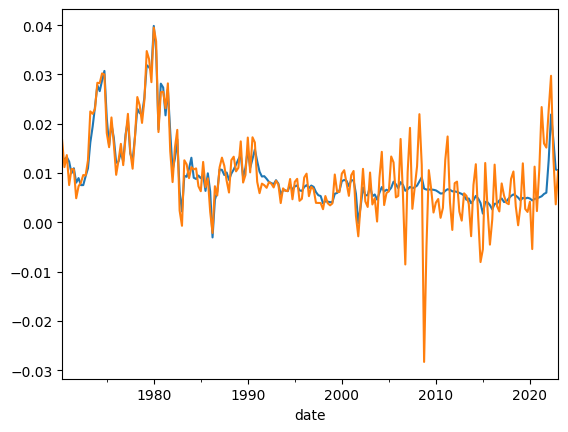

In [314]:
model.stored_state_means["etau"]["United States"].plot()
df_inflation.query("country == 'United States'").set_index("date")["inflation"].plot()

# 4. H-period ahead forecasting

In [315]:
df_inflation

country       date  inflation
0               Portugal 1970-04-01   0.000000
1            New Zealand 1970-04-01   0.015421
2     Dominican Republic 1970-04-01  -0.001604
3                Finland 1970-04-01   0.008333
4                Ireland 1970-04-01   0.029871
...                  ...        ...        ...
7415              Canada 2023-01-01   0.006080
7416              Sweden 2023-01-01   0.014955
7417               Korea 2023-01-01   0.010538
7418      United Kingdom 2023-01-01   0.008814
7419        South Africa 2023-01-01   0.011202

[7420 rows x 3 columns]

In [316]:
model.predict(df_inflation.query("date <= '2022-10-1'"))

inflation             country       date
0    0.006436            Portugal 2023-01-01
1    0.016447         New Zealand 2023-01-01
2    0.017008  Dominican Republic 2023-01-01
3    0.020870             Finland 2023-01-01
4    0.019239             Ireland 2023-01-01
5    0.020494             Austria 2023-01-01
6   -0.000805               Japan 2023-01-01
7    0.015693        South Africa 2023-01-01
8    0.013621               Korea 2023-01-01
9    0.015453                Fiji 2023-01-01
10   0.021861            Paraguay 2023-01-01
11   0.007792            Malaysia 2023-01-01
12   0.027512              Sweden 2023-01-01
13   0.002664         Switzerland 2023-01-01
14   0.002152            Thailand 2023-01-01
15  -0.000920              Cyprus 2023-01-01
16   0.028724           Mauritius 2023-01-01
17  -0.008883              Greece 2023-01-01
18   0.011424              France 2023-01-01
19   0.015831             Denmark 2023-01-01
20   0.013914         Netherlands 2023-01-01
21   0.028824             Türkiye 2023-01-01
22   0.010680           Singapore 2023-01-01
23   0.015477             Germany 2023-01-01
24   0.007235          Luxembourg 2023-01-01
25   0.012041           Guatemala 2023-01-01
26   0.005172              Norway 2023-01-01
27   0.033681             Belgium 2023-01-01
28   0.011399       United States 2023-01-01
29   0.010178              Canada 2023-01-01
30   0.047509               Italy 2023-01-01
31   0.019179      United Kingdom 2023-01-01
32   0.008302           Australia 2023-01-01
33   0.002490               Spain 2023-01-01
34   0.022708         Philippines 2023-01-01

In [317]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df_inflation, "2010-01-01", h=1)
forecast

inflation             country       date
0      0.010845            Portugal 2010-01-01
1      0.004101         New Zealand 2010-01-01
2      0.017343  Dominican Republic 2010-01-01
3     -0.002115             Finland 2010-01-01
4     -0.002696             Ireland 2010-01-01
...         ...                 ...        ...
1850   0.047509               Italy 2023-01-01
1851   0.019179      United Kingdom 2023-01-01
1852   0.008302           Australia 2023-01-01
1853   0.002490               Spain 2023-01-01
1854   0.022708         Philippines 2023-01-01

[1855 rows x 3 columns]

<Axes: xlabel='date'>

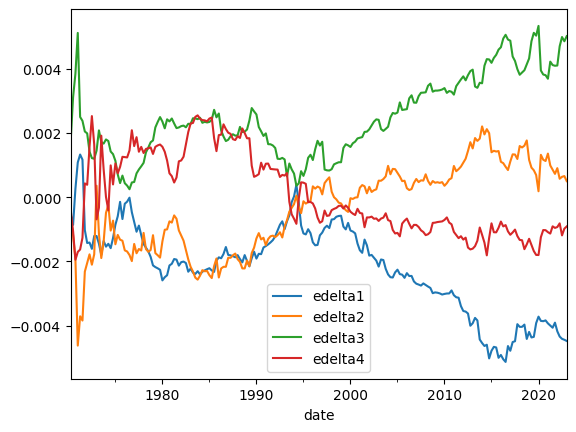

In [318]:
model.stored_state_means.loc["United States"][["edelta1", "edelta2", "edelta3", "edelta4"]].plot()

Text(0.5, 1.0, 'Forecasts, tau and actual inflation for the US')

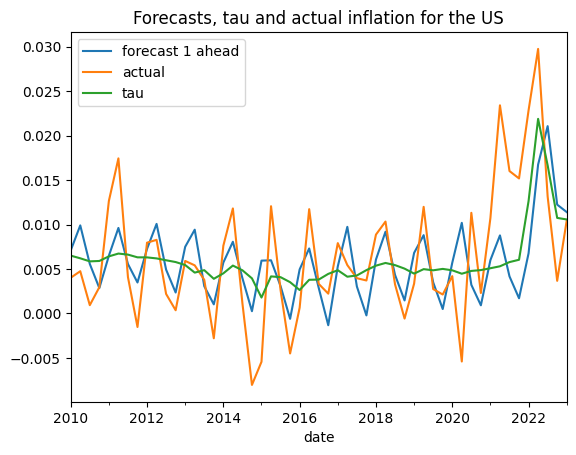

In [319]:
import matplotlib.pyplot as plt
forecast.query("country == 'United States'").set_index("date")['inflation'].plot(label = "forecast 1 ahead")
df_inflation.query("country == 'United States' and date >= '2010-01-01'").set_index("date")['inflation'].plot(label = "actual")
model.stored_state_means.loc["United States"].loc["2010-01-01":]["etau"].plot(label = "tau")
plt.legend()
plt.title("Forecasts, tau and actual inflation for the US")

Text(0.5, 1.0, 'Tau over time per country')

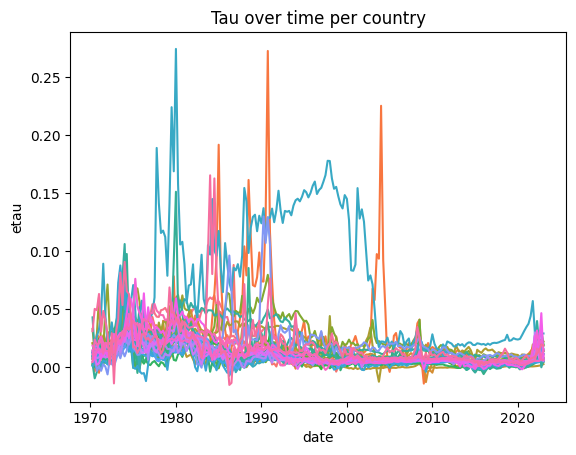

In [320]:
import seaborn as sns
sns.lineplot(
    data = model.stored_state_means["etau"].to_frame().reset_index(),
    x = "date",
    y = "etau",
    hue = "country"
)
plt.legend().remove()
plt.title("Tau over time per country")

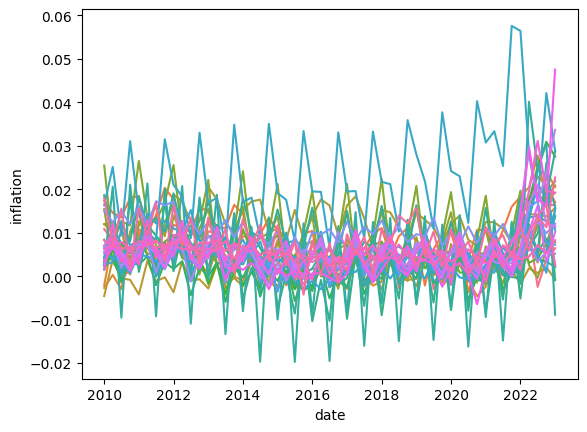

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(
    data = forecast,
    x = "date",
    y = "inflation",
    hue = "country"
)
# turn off legend
plt.legend().remove()

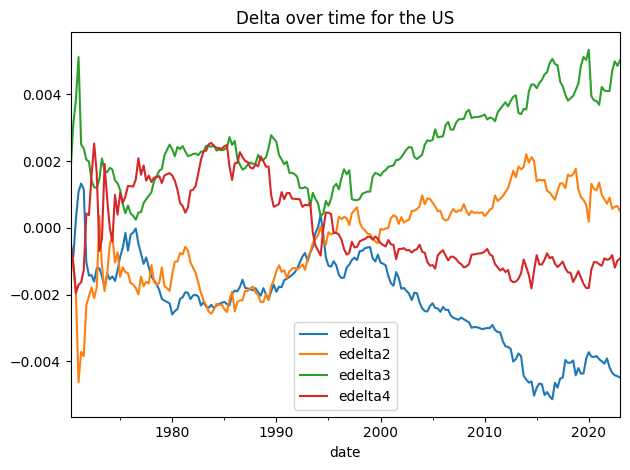

In [322]:
model.stored_state_means.loc["United States"][["edelta1", "edelta2", "edelta3", "edelta4"]].plot()
plt.title("Delta over time for the US")
plt.tight_layout()
plt.savefig("../../Figures/delta_over_time.png", dpi = 300)

# 5. Compare the forecast with the actual data

In [323]:
forecast_merged = forecast.copy().rename(columns={"inflation": "pred"})
forecast_merged = forecast_merged.merge(
    df_inflation[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

pred         country       date    actual
1755  0.003115         Austria 2022-07-01  0.026846
1756  0.000728           Japan 2022-07-01  0.010628
1757  0.014204    South Africa 2022-07-01  0.027957
1758  0.012320           Korea 2022-07-01  0.011352
1759 -0.000396            Fiji 2022-07-01  0.007368
...        ...             ...        ...       ...
1850  0.047509           Italy 2023-01-01  0.003938
1851  0.019179  United Kingdom 2023-01-01  0.008814
1852  0.008302       Australia 2023-01-01  0.013756
1853  0.002490           Spain 2023-01-01  0.006013
1854  0.022708     Philippines 2023-01-01  0.021330

[100 rows x 4 columns]

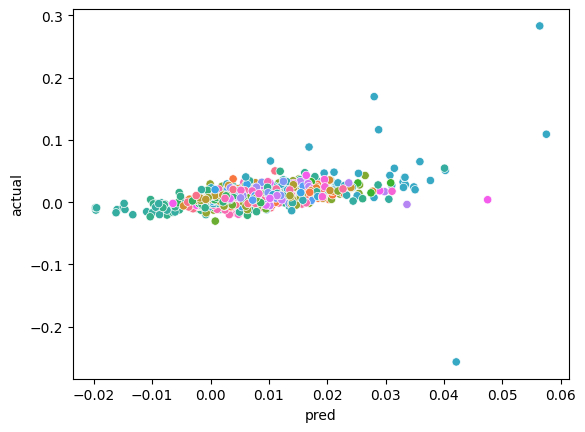

In [324]:
sns.scatterplot(
    data = forecast_merged,
    x = "pred",
    y = "actual",
    hue = "country"
)
plt.legend().remove()

In [325]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"])
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     578.5
Date:                Thu, 28 Mar 2024   Prob (F-statistic):          1.78e-111
Time:                        16:32:03   Log-Likelihood:                 5507.2
No. Observations:                1855   AIC:                        -1.101e+04
Df Residuals:                    1853   BIC:                        -1.100e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.000      1.802      0.072   -6.08e-05       0.001
pred           0.9862      0.041     24.052      0.000       0.906       1.067
==============================================================================
Omnibus:                     1724.114   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4763438.016
Skew:                          -2.999   Prob(JB):                         0.00
Kurtosis:                     251.180   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [361]:
#getDensities
from seminartools.models.uc_sv_ss_model import UCSVSSModel

#model.run_pf(df_inflation, aggregation_method = "distribution")
#distributionForecast = h_period_ahead_forecast(model, df_inflation, "2010-01-01", h=1)
model1 = UCSVSSModel(num_particles=1000, stochastic_seasonality=True)


In [364]:

model1.run_pf(df_inflation[df_inflation["country"] == "Switzerland"], aggregation_method = "distribution")
hi = model1._run_pf(df_inflation[df_inflation["country"]=="Switzerland"])
hi




100%|██████████| 1/1 [00:00<00:00, 286.89it/s]


[EmpiricalDistributionFunction(quantiles=array([-4.75731806e-02, -4.02576053e-02, -3.75494077e-02, -3.36750178e-02,
        -2.76510882e-02, -2.52851702e-02, -2.49501044e-02, -2.39373087e-02,
        -2.32036873e-02, -2.25745210e-02, -2.00727901e-02, -1.97969212e-02,
        -1.73862783e-02, -1.61071865e-02, -1.39070434e-02, -1.33789698e-02,
        -1.24397843e-02, -1.19769708e-02, -1.17679131e-02, -1.13371012e-02,
        -1.12855388e-02, -1.01237578e-02, -9.49966291e-03, -9.23807344e-03,
        -9.08166791e-03, -8.62825526e-03, -8.61410438e-03, -8.37881390e-03,
        -6.92429914e-03, -6.64293201e-03, -6.02111158e-03, -5.73297840e-03,
        -5.48146785e-03, -5.46719026e-03, -5.33125917e-03, -5.32511469e-03,
        -4.82531693e-03, -4.40025025e-03, -4.26464494e-03, -4.25439998e-03,
        -4.22483172e-03, -3.67928511e-03, -3.31533365e-03, -3.19669866e-03,
        -3.18840342e-03, -2.92155202e-03, -2.46433557e-03, -2.43857367e-03,
        -1.89782445e-03, -1.81237563e-03, -1.721

etau  \
country     date                                                            
Switzerland 1970-04-01  EmpiricalDistributionFunction(quantiles=array(...   
            1970-07-01  EmpiricalDistributionFunction(quantiles=array(...   
            1970-10-01  EmpiricalDistributionFunction(quantiles=array(...   
            1971-01-01  EmpiricalDistributionFunction(quantiles=array(...   
            1971-04-01  EmpiricalDistributionFunction(quantiles=array(...   
...                                                                   ...   
            2022-01-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-04-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-07-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-10-01  EmpiricalDistributionFunction(quantiles=array(...   
            2023-01-01  EmpiricalDistributionFunction(quantiles=array(...   

                        etauplusdeltas  \
country     date                         
Switzerland 1970-04-01        0.813902   
            1970-07-01        0.963006   
            1970-10-01        1.026738   
            1971-01-01        1.799729   
            1971-04-01        1.395840   
...                                ...   
            2022-01-01        0.330055   
            2022-04-01        1.182863   
            2022-07-01        0.708283   
            2022-10-01        0.818569   
            2023-01-01        0.181555   

                                                                elnsetasq  \
country     date                                                            
Switzerland 1970-04-01  EmpiricalDistributionFunction(quantiles=array(...   
            1970-07-01  EmpiricalDistributionFunction(quantiles=array(...   
            1970-10-01  EmpiricalDistributionFunction(quantiles=array(...   
            1971-01-01  EmpiricalDistributionFunction(quantiles=array(...   
            1971-04-01  EmpiricalDistributionFunction(quantiles=array(...   
...                                                                   ...   
            2022-01-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-04-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-07-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-10-01  EmpiricalDistributionFunction(quantiles=array(...   
            2023-01-01  EmpiricalDistributionFunction(quantiles=array(...   

                                                                esigmaeta  \
country     date                                                            
Switzerland 1970-04-01  EmpiricalDistributionFunction(quantiles=array(...   
            1970-07-01  EmpiricalDistributionFunction(quantiles=array(...   
            1970-10-01  EmpiricalDistributionFunction(quantiles=array(...   
            1971-01-01  EmpiricalDistributionFunction(quantiles=array(...   
            1971-04-01  EmpiricalDistributionFunction(quantiles=array(...   
...                                                                   ...   
            2022-01-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-04-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-07-01  EmpiricalDistributionFunction(quantiles=array(...   
            2022-10-01  EmpiricalDistributionFunction(quantiles=array(...   
            2023-01-01  EmpiricalDistributionFunction(quantiles=array(...   

                                                            elnsepsilonsq  \
country     date                                                            
Switzerland 1970-04-01  EmpiricalDistributionFunction(quantiles=array(...   
            1970-07-01  EmpiricalDistributionFunction(quantiles=array(...   
            1970-10-01  EmpiricalDistributionFunction(quantiles=array(...   
            1971-01-01  EmpiricalDistributionFunction(quantiles=array(...   
            1971-04-01  EmpiricalDistributionFunction(

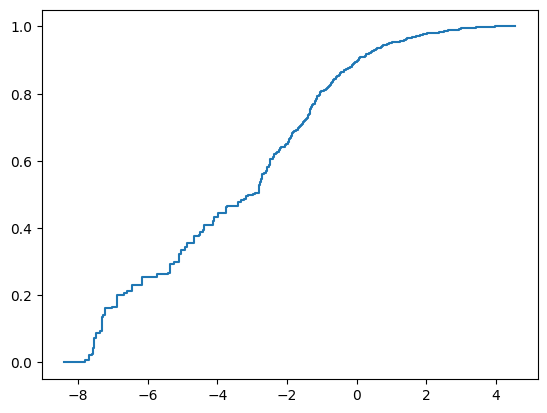

In [371]:
import numpy as np
hi.iloc[1,2].plot()
np.apply(kdehi.iloc[1,2])